<a href="https://colab.research.google.com/github/VasavSrivastava/MAT422/blob/main/HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**2.4.1 Maximum Likelihood Estimation for Random Samples**

Maximum Likelihood Estimation (MLE) is a method used to estimate the parameters of a probability distribution by maximizing the likelihood function, which represents the probability of observing the given random sample under a specific model. For a set of independent and identically distributed random samples $X_1, X_2, \dots, X_n$ drawn from a probability distribution with parameter $\theta$, the likelihood function is defined as the product of the individual probability density functions (pdf) or probability mass functions (pmf), depending on whether the data is continuous or discrete. The MLE estimates $\hat{\theta}$ by maximizing this likelihood function. The likelihood function $L(\theta)$ for a sample is $$L(\theta) = \prod_{i=1}^{n} f(X_i \mid \theta)$$ Alternatively, the log-likelihood function is often maximized for simplicity: $$\ell(\theta) = \log L(\theta) = \sum_{i=1}^{n} \log f(X_i \mid \theta)$$ The MLE $\hat{\theta}$ is the value of $\theta$ that maximizes $\ell(\theta)$. This involves solving $$\frac{\partial \ell(\theta)}{\partial \theta} = 0$$ to find the optimal $\hat{\theta}$.

In [1]:
import numpy as np
from scipy.optimize import minimize

# Generate random data from a normal distribution with mean=5, std=2
np.random.seed(0)
data = np.random.normal(5, 2, size=100)

# Define the negative log-likelihood function for a normal distribution
def neg_log_likelihood(params):
    mu, sigma = params[0], params[1]
    n = len(data)
    # Log-likelihood function for normal distribution
    log_likelihood = -n * np.log(sigma) - (1 / (2 * sigma**2)) * np.sum((data - mu)**2)
    return -log_likelihood  # return the negative because we will minimize it

# Initial guess for the parameters
initial_guess = [0, 1]

# Use 'minimize' from scipy to find the MLE for mu and sigma
result = minimize(neg_log_likelihood, initial_guess, bounds=[(None, None), (1e-5, None)])

# Get the estimated parameters
mle_mu, mle_sigma = result.x

print(f"MLE for mean (mu): {mle_mu}")
print(f"MLE for standard deviation (sigma): {mle_sigma}")

MLE for mean (mu): 5.119616747443067
MLE for standard deviation (sigma): 2.015764363606092


#**2.4.2 Linear Regression**

Linear Regression is used to model the relationship between a dependent variable (target) and one or more independent variables (predictors). In the case of simple linear regression, with one independent variable, the relationship is modeled as a straight line: $y = \beta_0 + \beta_1 x + \epsilon$, where $y$ is the dependent variable, $x$ is the independent variable, $\beta_0$ is the intercept, $\beta_1$ is the slope (coefficient) of the line, and $\epsilon$ is the error term. The goal of linear regression is to estimate the parameters $\beta_0$ and $\beta_1$ by minimizing the sum of squared errors (SSE) between the observed values and the predicted values. This is done by solving for the values of $\beta_0$ and $\beta_1$ that minimize the following cost function: $$ SSE = \sum_{i=1}^{n} (y_i - (\beta_0 + \beta_1 x_i))^2$$ In the case of multiple linear regression, the model extends to multiple independent variables, and the equation becomes: $y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_p x_p + \epsilon$.

Intercept (beta_0): 4.222151077447231
Slope (beta_1): 2.968467510701019


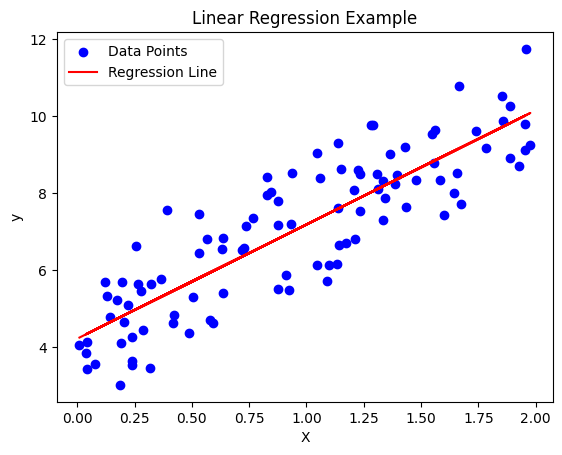

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate some random data for linear regression
np.random.seed(0)
X = 2 * np.random.rand(100, 1)  # Random feature data (independent variable)
y = 4 + 3 * X + np.random.randn(100, 1)  # Dependent variable (with some noise)

# Fit a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Get the slope (beta_1) and intercept (beta_0)
beta_0 = lin_reg.intercept_[0]
beta_1 = lin_reg.coef_[0][0]

print(f"Intercept (beta_0): {beta_0}")
print(f"Slope (beta_1): {beta_1}")

# Plot the data and the regression line
plt.scatter(X, y, color="blue", label="Data Points")
plt.plot(X, lin_reg.predict(X), color="red", label="Regression Line")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression Example")
plt.legend()
plt.show()